<a href="https://colab.research.google.com/github/hsallrounder/Introduction-to-Machine-Learning-Lab/blob/master/Regression_on_Headbrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
df.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [ ]:
X = df['Head Size(cm^3)']
y = df['Brain Weight(grams)']

0.26342933948939945
325.57342104944223
y = 0.26 x + 325.57


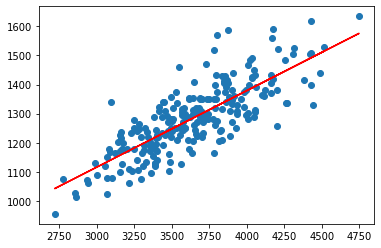

In [ ]:
import matplotlib.pyplot as plt

sigmaX=0
sigmaY=0
for i in range(len(X)):
  sigmaX+=X[i]
  sigmaY+=y[i]
meanX = sigmaX/(len(X))
meanY = sigmaY/(len(y))
X1 = []
Y1 = []
for i in X:
  X1.append(i-meanX)
for i in y:
  Y1.append(i-meanY)
XY =[]
for i in range(len(X)):
  XY.append(X1[i]*Y1[i])  
X11=[]
for i in X1:
  X11.append(i*i)
sum_X1 = sum(X1)
sum_Y1 = sum(Y1)
m = sum(XY)/sum(X11)
print(m)

c = sigmaY/len(y) - m*(sigmaX/len(X))
print(c)
print("y = %.2f x + %.2f"%(m,c))
plt.scatter(X, y)
plt.plot(X, m*X + c,color = 'Red')
plt.show()

In [ ]:
import math
from sklearn.metrics import r2_score
Predicted = []
for i in range(len(X)):
  x1 = X[i]
  y1 = m*x1 + c
  Predicted.append(y1)
sigmaErr=0
for i in range(len(X)):
  sigmaErr+= (Predicted[i]-y[i])*(Predicted[i]-y[i])

mean = sigmaErr/len(X)
print(math.sqrt(mean))
print("R2 Score = ",r2_score(y,Predicted))

72.1206213783709
R2 Score =  0.639311719957


In [ ]:
#using sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
X1 = np.asarray(X)
y1 = np.asarray(y)

md = LinearRegression()
md.fit(X1.reshape(-1,1),y1)
print("R2 Score =",md.score(X1.reshape(-1,1),y1))
print(md.intercept_,md.coef_)

R2 Score = 0.639311719957
325.5734210494426 [0.26342934]


In [ ]:
X = df['Head Size(cm^3)'].values/1000
Y = df['Brain Weight(grams)'].values/1000

In [ ]:
class GradientDescentLinearRegression:
  def __init__(self, learning_rate=0.001, iterations=200):
    self.learning_rate, self.iterations = learning_rate, iterations
  def fit(self, X, y):
    b0 = 0
    b1 = 0
    n = X.shape[0]
    for _ in range(self.iterations):
      b0_deri = np.sum(b1*X + b0 - y )/n
      b1_deri = np.sum(X*((b1*X + b0) - y))/n
      b0 = b0 - (self.learning_rate*b0_deri)
      b1 = b1 - (self.learning_rate*b1_deri)
      plt.plot(X,(b0+b1*X))
    self.b0, self.b1 = b0, b1
  def predict(self, X):
    return self.b0 + self.b1*X
  def rmse(self, X):
    rmse = 0
    n = X.shape[0]
    for i in range(n):
      y_pred = self.predict(X[i])
      rmse += (y_pred - y[i])**2
      rmse = np.sqrt(rmse/n)
    return rmse


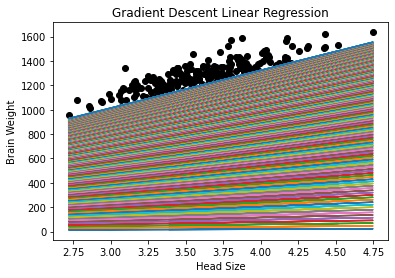

RMSE 0.9220272043958869


In [ ]:
clf = GradientDescentLinearRegression()
clf.fit(X,y)
plt.scatter(X,y,color='black')
plt.plot(X, clf.predict(X))
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.title("Gradient Descent Linear Regression")
plt.show()
#compute rmse
rms = clf.rmse(X)
print("RMSE",rms)
